[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


=== 단기 수익률 기준 문재인 테마주 vs KODEX200 상관계수 ===
KODEX200    1.000000
유성티엔에스      0.662400
피에스엠씨       0.313638
서희건설        0.239620
조광페인트       0.062628
바른손        -0.024400
에이엔피       -0.138915
우리들제약      -0.168507
Name: KODEX200, dtype: float64


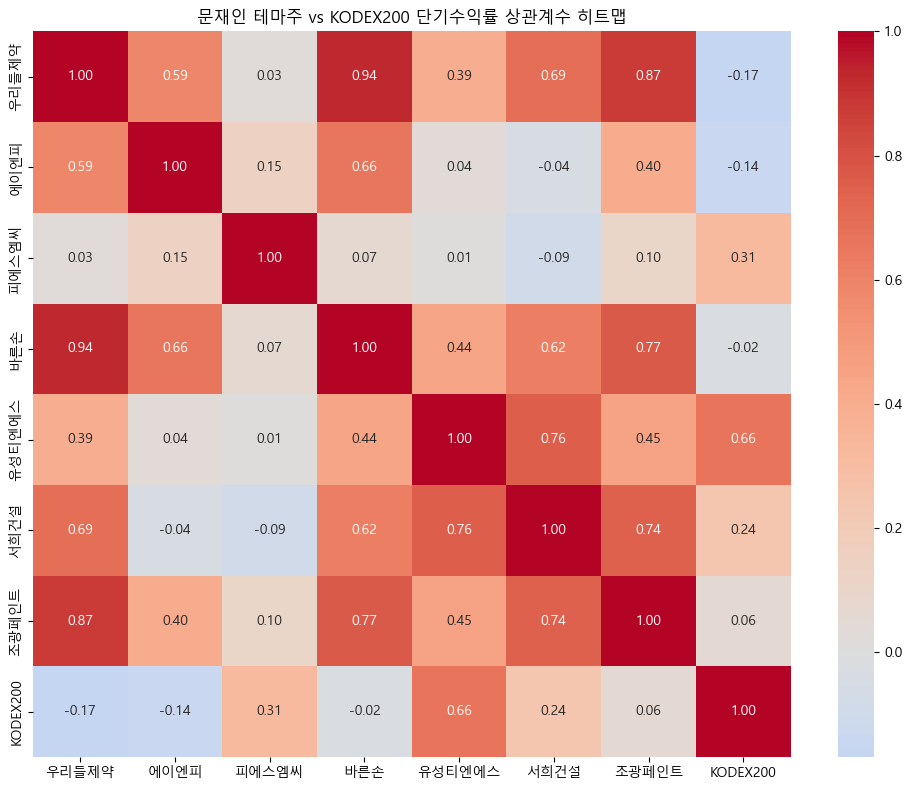

In [4]:
import yfinance  as yf
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False


label_dict = {
    'thema1': '우리들제약',
    'thema3': '에이엔피',
    'thema4': '피에스엠씨',
    'thema5': '바른손',
    'thema6': '유성티엔에스',
    'thema7': '서희건설',
    'thema9': '조광페인트',
}


# 날짜 설정
start_date = '2012-09-06' # 경선확정일 - 10
end_date = '2012-09-26' # 경선확정일 + 10

#테마주2  테마를 추가하고싶으면 아래에 이어서 적으시면됩니다.# thema2 = fdr.DataReader('015260', start=start_date, end=end_date)
#(1) 이 밑으로 계속 추가한 후 plt 부분에 같이 추가하시면 같이 시각화 가능
thema1 = yf.download('004720.ks', start=start_date, end=end_date) #테마주1
thema3 = yf.download('015260.ks', start=start_date, end=end_date)
thema4 = yf.download('024850.ks', start=start_date, end=end_date)
thema5 = yf.download('018700.ks', start=start_date, end=end_date)
thema6 = yf.download('024800.ks', start=start_date, end=end_date)
thema7 = yf.download('035890.ks', start=start_date, end=end_date)
thema9 = yf.download('004910.ks', start=start_date, end=end_date)



thema= pd.DataFrame()
#(1)에 추가했을 경우 이 부분도 추가해주세요
thema['thema1'] = thema1['Close']
thema['thema3'] = thema3['Close']
thema['thema4'] = thema4['Close']
thema['thema5'] = thema5['Close']
thema['thema6'] = thema6['Close']
thema['thema7'] = thema7['Close']
thema['thema9'] = thema9['Close']

# 일간 기준 리샘플링 및 로그수익률 계산
thema = thema.resample('d').last()
thema_returns = np.log(thema / thema.shift(1)).dropna()
thema_returns_named = thema_returns.rename(columns=label_dict)

# KODEX200 수집 및 수익률 계산
kodex = yf.download('069500.KS', start=start_date, end=end_date)['Close']
kodex = kodex.resample('d').last()
kodex_return = np.log(kodex / kodex.shift(1)).dropna()

# KODEX200 수익률 추가
thema_returns_named['KODEX200'] = kodex_return

# 상관관계 계산
correlation_matrix = thema_returns_named.corr()

# 출력
print("=== 단기 수익률 기준 문재인 테마주 vs KODEX200 상관계수 ===")
print(correlation_matrix['KODEX200'].sort_values(ascending=False))

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("문재인 테마주 vs KODEX200 단기수익률 상관계수 히트맵")
plt.tight_layout()
plt.show()
